In [1]:
!pip install feedparser newspaper3k


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=09c5534e5fcafb38a6d3d756cc34de31e07338bbe57a51fccd6a9f13eb3bead7
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=9f3e25a78de9a798105f3135f66c43b8b80514149153aa18d033f4e7b0e8fe50
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [61]:
import feedparser
import json
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt


In [3]:
data = feedparser.parse('https://news.google.com/rss/search?q=inida%20news&hl=en-IN&gl=IN&ceid=IN%3Aen')

In [4]:
type(data['entries'])

list

In [5]:
len(data['entries'])

100


# Data Saving

In [6]:
data['entries'][0]

{'title': "Top events on March 17: INDIA bloc's mega rally in Mumbai, PM Modi in Andhra Pradesh, Russian polls conclude, and more | Mint - Mint",
 'title_detail': {'type': 'text/plain',
  'language': None,
  'base': 'https://news.google.com/rss/search?q=inida%20news&hl=en-IN&gl=IN&ceid=IN%3Aen',
  'value': "Top events on March 17: INDIA bloc's mega rally in Mumbai, PM Modi in Andhra Pradesh, Russian polls conclude, and more | Mint - Mint"},
 'links': [{'rel': 'alternate',
   'type': 'text/html',
   'href': 'https://news.google.com/rss/articles/CBMiqQFodHRwczovL3d3dy5saXZlbWludC5jb20vbmV3cy9pbmRpYS90b3AtZXZlbnRzLW9uLW1hcmNoLTE3LWluZGlhLWJsb2NzLW1lZ2EtcmFsbHktaW4tbXVtYmFpLXBtLW1vZGktaW4tYW5kaHJhLXByYWRlc2gtcnVzc2lhbi1wb2xscy1jb25jbHVkZS1hbmQtbW9yZS0xMTcxMDYzODkxMzc0Ni5odG1s0gGtAWh0dHBzOi8vd3d3LmxpdmVtaW50LmNvbS9uZXdzL2luZGlhL3RvcC1ldmVudHMtb24tbWFyY2gtMTctaW5kaWEtYmxvY3MtbWVnYS1yYWxseS1pbi1tdW1iYWktcG0tbW9kaS1pbi1hbmRocmEtcHJhZGVzaC1ydXNzaWFuLXBvbGxzLWNvbmNsdWRlLWFuZC1tb3JlL2FtcC0xMTcxMD

In [7]:
results=[]

for d in data['entries']:
  results.append({
      'title':d['title'],
      'link': d['link'],
      'date': d['published']

  })

In [8]:
results

[{'title': "Top events on March 17: INDIA bloc's mega rally in Mumbai, PM Modi in Andhra Pradesh, Russian polls conclude, and more | Mint - Mint",
  'link': 'https://news.google.com/rss/articles/CBMiqQFodHRwczovL3d3dy5saXZlbWludC5jb20vbmV3cy9pbmRpYS90b3AtZXZlbnRzLW9uLW1hcmNoLTE3LWluZGlhLWJsb2NzLW1lZ2EtcmFsbHktaW4tbXVtYmFpLXBtLW1vZGktaW4tYW5kaHJhLXByYWRlc2gtcnVzc2lhbi1wb2xscy1jb25jbHVkZS1hbmQtbW9yZS0xMTcxMDYzODkxMzc0Ni5odG1s0gGtAWh0dHBzOi8vd3d3LmxpdmVtaW50LmNvbS9uZXdzL2luZGlhL3RvcC1ldmVudHMtb24tbWFyY2gtMTctaW5kaWEtYmxvY3MtbWVnYS1yYWxseS1pbi1tdW1iYWktcG0tbW9kaS1pbi1hbmRocmEtcHJhZGVzaC1ydXNzaWFuLXBvbGxzLWNvbmNsdWRlLWFuZC1tb3JlL2FtcC0xMTcxMDYzODkxMzc0Ni5odG1s?oc=5',
  'date': 'Sun, 17 Mar 2024 02:05:22 GMT'},
 {'title': "IPL won't be shifted out of India: BCCI - The Times of India",
  'link': 'https://news.google.com/rss/articles/CBMiaWh0dHBzOi8vdGltZXNvZmluZGlhLmluZGlhdGltZXMuY29tL2luZGlhL2lwbC13b250LWJlLXNoaWZ0ZWQtb3V0LW9mLWluZGlhLWJjY2kvYXJ0aWNsZXNob3cvMTA4NTU1ODU1LmNtc9IBbWh0dHBzOi8vdG

In [9]:
#save the result lists as a JSON

In [10]:
with open('results.json','w') as f:
  f.write(json.dumps(results))


In [11]:
results_df = pd.DataFrame(results)

In [12]:
results_df.head()

,title,link,date
0,Top events on March 17: INDIA bloc's mega rall...,https://news.google.com/rss/articles/CBMiqQFod...,"Sun, 17 Mar 2024 02:05:22 GMT"
1,IPL won't be shifted out of India: BCCI - The ...,https://news.google.com/rss/articles/CBMiaWh0d...,"Sun, 17 Mar 2024 01:03:00 GMT"
2,Just how big is India’s 2024 election? Find ou...,https://news.google.com/rss/articles/CBMicmh0d...,"Sat, 16 Mar 2024 11:37:50 GMT"
3,Lok Sabha Election 2024 Date: Polling From Apr...,https://news.google.com/rss/articles/CBMivgFod...,"Sun, 17 Mar 2024 06:02:14 GMT"
4,Opp show of strength at Shivaji Park today as ...,https://news.google.com/rss/articles/CBMisQFod...,"Sat, 16 Mar 2024 18:17:30 GMT"


In [13]:
results_df.to_csv('results.csv', index=False)

# Read raw articles JSON and Download article text

In [18]:
with open('results.json','r')as f:
  articles = json.loads(f.read())

In [19]:
articles

[{'title': "Top events on March 17: INDIA bloc's mega rally in Mumbai, PM Modi in Andhra Pradesh, Russian polls conclude, and more | Mint - Mint",
  'link': 'https://news.google.com/rss/articles/CBMiqQFodHRwczovL3d3dy5saXZlbWludC5jb20vbmV3cy9pbmRpYS90b3AtZXZlbnRzLW9uLW1hcmNoLTE3LWluZGlhLWJsb2NzLW1lZ2EtcmFsbHktaW4tbXVtYmFpLXBtLW1vZGktaW4tYW5kaHJhLXByYWRlc2gtcnVzc2lhbi1wb2xscy1jb25jbHVkZS1hbmQtbW9yZS0xMTcxMDYzODkxMzc0Ni5odG1s0gGtAWh0dHBzOi8vd3d3LmxpdmVtaW50LmNvbS9uZXdzL2luZGlhL3RvcC1ldmVudHMtb24tbWFyY2gtMTctaW5kaWEtYmxvY3MtbWVnYS1yYWxseS1pbi1tdW1iYWktcG0tbW9kaS1pbi1hbmRocmEtcHJhZGVzaC1ydXNzaWFuLXBvbGxzLWNvbmNsdWRlLWFuZC1tb3JlL2FtcC0xMTcxMDYzODkxMzc0Ni5odG1s?oc=5',
  'date': 'Sun, 17 Mar 2024 02:05:22 GMT'},
 {'title': "IPL won't be shifted out of India: BCCI - The Times of India",
  'link': 'https://news.google.com/rss/articles/CBMiaWh0dHBzOi8vdGltZXNvZmluZGlhLmluZGlhdGltZXMuY29tL2luZGlhL2lwbC13b250LWJlLXNoaWZ0ZWQtb3V0LW9mLWluZGlhLWJjY2kvYXJ0aWNsZXNob3cvMTA4NTU1ODU1LmNtc9IBbWh0dHBzOi8vdG

In [15]:
from newspaper import Article

In [31]:
for a in articles:
  link = a['link']
  print(f"processing {a['title']}")
  try:
    #Initializing Article instance
    article_obj = Article(link)
      #Download the article
    article_obj.download()
      #parse the article
    article_obj.parse()
    #Capture the text
    txt = article_obj.text
    a['text'] = txt

  except:
    a['txt']=''


processing Top events on March 17: INDIA bloc's mega rally in Mumbai, PM Modi in Andhra Pradesh, Russian polls conclude, and more | Mint - Mint
processing IPL won't be shifted out of India: BCCI - The Times of India
processing Just how big is India’s 2024 election? Find out in seven numbers - Al Jazeera English
processing Lok Sabha Election 2024 Date: Polling From April 19 In 7 Phases; Modi Says Oppn Is Rudderless & Issueless - News18
processing Opp show of strength at Shivaji Park today as INDIA bloc kicks off poll campaign - The Indian Express
processing With Agni V test, India makes the MIRV leap - The Hindu
processing IPL will be entirely held in India, will make schedule very soon: Jay Shah - Business Standard
processing Rahul Gandhi, Opposition's mega rally at Mumbai's Shivaji Park today; Sharad Pawar, MK Stalin to join - Hindustan Times
processing India: Citizenship Amendment Act is a blow to Indian constitutional values and international standards - Amnesty International
proces

In [33]:
with open('result_text.json','w')as f:
  f.write(json.dumps(articles))

In [34]:
articles[6]

{'title': 'IPL will be entirely held in India, will make schedule very soon: Jay Shah - Business Standard',
 'link': 'https://news.google.com/rss/articles/CBMiiQFodHRwczovL3d3dy5idXNpbmVzcy1zdGFuZGFyZC5jb20vd29ybGQtbmV3cy9pcGwtd2lsbC1iZS1lbnRpcmVseS1oZWxkLWluLWluZGlhLXdpbGwtbWFrZS1zY2hlZHVsZS12ZXJ5LXNvb24tamF5LXNoYWgtMTI0MDMxNjAwODMxXzEuaHRtbNIBjQFodHRwczovL3d3dy5idXNpbmVzcy1zdGFuZGFyZC5jb20vYW1wL3dvcmxkLW5ld3MvaXBsLXdpbGwtYmUtZW50aXJlbHktaGVsZC1pbi1pbmRpYS13aWxsLW1ha2Utc2NoZWR1bGUtdmVyeS1zb29uLWpheS1zaGFoLTEyNDAzMTYwMDgzMV8xLmh0bWw?oc=5',
 'date': 'Sat, 16 Mar 2024 17:52:13 GMT',
 'text': 'The schedule for the first two weeks has been already released with defending champions Chennai Super Kings taking on Royal Challengers Bangalore at home on March 22\n\nBCCI secretary Jay Shah on Saturday dismissed speculation that the league would be shifted to the UAE due to the upcoming general elections in the country between April 19 to June 1.\n\nThere were endless rumours about the IPL being 

In [36]:
summarizer = pipeline("summarization", model="Falconsai/medical_summarization")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [42]:
res=summarizer(articles[0]['text'], max_length=300, min_length=30, do_sample=False)


In [40]:
type(res)

list

In [44]:
res[0]

{'summary_text': "the world is set to witness a series of important political events today, Sunday, March 17 . from the Russian presidential elections' final day of voting to Prime Minister Narendra Modi's Lok Sabha poll campaign in Andhra Pradesh, Mint lists important events to watch . this comes days after he completed an extensive 10-state tour of India , during which he unveiled development projects valued at thousands of crores and attended numerous important occasions including his first visit to Jammu and Kashmir since Article 370 was abrogated . more than half of Russian voters have already gone to the polls in the first two days of the three-day election . today, students will appear for M.Ed, Criminology, Physical Education, MA Education, and Food Engineering and Technology exams . - the common university Entrance test for postgraduate programmes graduation (CUET-PG) is being conducted by the National Testing Agency (NTA ) . the exams are pre-requisite to take admission to Ce

In [45]:
res[0]['summary_text']

"the world is set to witness a series of important political events today, Sunday, March 17 . from the Russian presidential elections' final day of voting to Prime Minister Narendra Modi's Lok Sabha poll campaign in Andhra Pradesh, Mint lists important events to watch . this comes days after he completed an extensive 10-state tour of India , during which he unveiled development projects valued at thousands of crores and attended numerous important occasions including his first visit to Jammu and Kashmir since Article 370 was abrogated . more than half of Russian voters have already gone to the polls in the first two days of the three-day election . today, students will appear for M.Ed, Criminology, Physical Education, MA Education, and Food Engineering and Technology exams . - the common university Entrance test for postgraduate programmes graduation (CUET-PG) is being conducted by the National Testing Agency (NTA ) . the exams are pre-requisite to take admission to Central and State U

In [49]:
for idx, a in enumerate(articles, start=1):
  print(f"Processing article {idx}")
  max_summary_len=min(500, len(a['text']))
  if len(a['text'])>30:
    summary = summarizer(a['text'], max_length=max_summary_len,min_length=30,do_sample=False)
    a['summary']=summary[0]['summary_text']
  else:
    a['summary'] =''

Processing article 1


Your max_length is set to 500, but your input_length is only 257. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=128)


Processing article 2
Processing article 3


Your max_length is set to 500, but your input_length is only 196. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=98)


Processing article 4
Processing article 5
Processing article 6


Your max_length is set to 500, but your input_length is only 362. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=181)


Processing article 7
Processing article 8
Processing article 9
Processing article 10
Processing article 11


Your max_length is set to 500, but your input_length is only 333. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=166)


Processing article 12


Your max_length is set to 500, but your input_length is only 238. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=119)


Processing article 13
Processing article 14
Processing article 15


Your max_length is set to 500, but your input_length is only 353. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=176)


Processing article 16
Processing article 17


Your max_length is set to 500, but your input_length is only 257. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=128)


Processing article 18


Your max_length is set to 500, but your input_length is only 377. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=188)


Processing article 19
Processing article 20
Processing article 21


Your max_length is set to 500, but your input_length is only 447. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=223)


Processing article 22
Processing article 23


Your max_length is set to 410, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)


Processing article 24
Processing article 25
Processing article 26
Processing article 27
Processing article 28
Processing article 29


Your max_length is set to 500, but your input_length is only 421. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=210)


Processing article 30


Your max_length is set to 500, but your input_length is only 401. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=200)


Processing article 31
Processing article 32
Processing article 33


Your max_length is set to 500, but your input_length is only 396. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=198)


Processing article 34
Processing article 35
Processing article 36
Processing article 37
Processing article 38
Processing article 39


Your max_length is set to 500, but your input_length is only 441. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=220)


Processing article 40


Your max_length is set to 500, but your input_length is only 281. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=140)


Processing article 41


Your max_length is set to 500, but your input_length is only 378. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=189)


Processing article 42
Processing article 43


Your max_length is set to 500, but your input_length is only 400. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=200)


Processing article 44
Processing article 45
Processing article 46
Processing article 47
Processing article 48
Processing article 49
Processing article 50


Your max_length is set to 500, but your input_length is only 217. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=108)


Processing article 51


Your max_length is set to 500, but your input_length is only 361. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=180)


Processing article 52


Your max_length is set to 500, but your input_length is only 382. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=191)


Processing article 53


Your max_length is set to 500, but your input_length is only 371. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=185)


Processing article 54
Processing article 55
Processing article 56
Processing article 57
Processing article 58
Processing article 59
Processing article 60
Processing article 61
Processing article 62


Your max_length is set to 500, but your input_length is only 489. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=244)


Processing article 63
Processing article 64


Your max_length is set to 235, but your input_length is only 52. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)


Processing article 65
Processing article 66
Processing article 67


Your max_length is set to 500, but your input_length is only 375. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=187)


Processing article 68


Your max_length is set to 500, but your input_length is only 402. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=201)


Processing article 69
Processing article 70
Processing article 71
Processing article 72
Processing article 73


Your max_length is set to 200, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Processing article 74
Processing article 75
Processing article 76


Your max_length is set to 500, but your input_length is only 482. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=241)


Processing article 77


Your max_length is set to 500, but your input_length is only 389. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=194)


Processing article 78
Processing article 79


Your max_length is set to 500, but your input_length is only 472. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=236)


Processing article 80
Processing article 81


Your max_length is set to 500, but your input_length is only 220. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=110)


Processing article 82
Processing article 83
Processing article 84
Processing article 85


Your max_length is set to 329, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


Processing article 86
Processing article 87
Processing article 88
Processing article 89


Your max_length is set to 500, but your input_length is only 486. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=243)


Processing article 90


Your max_length is set to 500, but your input_length is only 220. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=110)


Processing article 91
Processing article 92


Your max_length is set to 500, but your input_length is only 172. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)


Processing article 93


Your max_length is set to 500, but your input_length is only 142. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)


Processing article 94
Processing article 95


Your max_length is set to 500, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Processing article 96
Processing article 97
Processing article 98


Your max_length is set to 500, but your input_length is only 491. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=245)


Processing article 99


Your max_length is set to 500, but your input_length is only 258. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=129)


Processing article 100


In [50]:
#Initialize Sentiment analysis pipeline
model_path='cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [52]:
sentiment_task(articles[3]['summary'])

[{'label': 'neutral', 'score': 0.8873941898345947}]

In [56]:
for idx, a in enumerate(articles, start=1):
  print(f"Processing article {idx}")
  if len(a['summary'])>0:
    sentiment = sentiment_task(a['summary'])[0]['label']
    a['sentiment']=sentiment
  else:
    a['sentiment'] ='neutral'

Processing article 1
Processing article 2
Processing article 3
Processing article 4
Processing article 5
Processing article 6
Processing article 7
Processing article 8
Processing article 9
Processing article 10
Processing article 11
Processing article 12
Processing article 13
Processing article 14
Processing article 15
Processing article 16
Processing article 17
Processing article 18
Processing article 19
Processing article 20
Processing article 21
Processing article 22
Processing article 23
Processing article 24
Processing article 25
Processing article 26
Processing article 27
Processing article 28
Processing article 29
Processing article 30
Processing article 31
Processing article 32
Processing article 33
Processing article 34
Processing article 35
Processing article 36
Processing article 37
Processing article 38
Processing article 39
Processing article 40
Processing article 41
Processing article 42
Processing article 43
Processing article 44
Processing article 45
Processing article 

In [57]:
[i['sentiment'] for i in articles]

['positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',


In [58]:
with open('articles_summ_sent.json','w') as f:
  f.write(json.dumps(articles))

In [59]:
articles_df = pd.DataFrame(articles)

In [60]:
articles_df

,title,link,date,text,summary,sentiment
0,Top events on March 17: INDIA bloc's mega rall...,https://news.google.com/rss/articles/CBMiqQFod...,"Sun, 17 Mar 2024 02:05:22 GMT",The world is set to witness a series of import...,the world is set to witness a series of import...,positive
1,IPL won't be shifted out of India: BCCI - The ...,https://news.google.com/rss/articles/CBMiaWh0d...,"Sun, 17 Mar 2024 01:03:00 GMT",NEW DELHI: Putting to rest speculation that th...,the Indian Premier League ( IPL ) was moved ou...,neutral
2,Just how big is India’s 2024 election? Find ou...,https://news.google.com/rss/articles/CBMicmh0d...,"Sat, 16 Mar 2024 11:37:50 GMT",About 969 million people will take part in the...,a model code of conduct is set to be applied t...,neutral
3,Lok Sabha Election 2024 Date: Polling From Apr...,https://news.google.com/rss/articles/CBMivgFod...,"Sun, 17 Mar 2024 06:02:14 GMT","Lok Sabha Election 2024 Date, Schedule Updates...",a total of 96.8 crore voters will be eligible ...,neutral
4,Opp show of strength at Shivaji Park today as ...,https://news.google.com/rss/articles/CBMisQFod...,"Sat, 16 Mar 2024 18:17:30 GMT",A day after the announcement of the schedule f...,the rally at the end of Congress leader Rahul ...,positive
...,...,...,...,...,...,...
95,India NEWS LIVE Updates: Defence ministry sign...,https://news.google.com/rss/articles/CBMiqQFod...,"Wed, 13 Mar 2024 18:44:20 GMT",,,neutral
96,Shark Tank India: Aman Gupta tells Amit Jain ‘...,https://news.google.com/rss/articles/CBMihQFod...,"Wed, 13 Mar 2024 13:09:06 GMT",A recent episode of Shark Tank India saw Aman ...,a recent episode of Shark Tank India saw a fam...,neutral
97,CAA: Why India's new citizenship law is so con...,https://news.google.com/rss/articles/CBMiYmh0d...,"Tue, 12 Mar 2024 07:50:37 GMT",NEW DELHI (AP) — India has implemented a citiz...,background and objectives : the national Regis...,neutral
98,UK professor deported over ‘anti-India line on...,https://news.google.com/rss/articles/CBMieWh0d...,"Tue, 27 Feb 2024 08:00:00 GMT",NEW DELHI: UK academic Nitasha Kaul was deport...,background and background of a subject particu...,neutral


In [63]:
articles_df['sentiment'].value_counts()

neutral     83
positive     9
negative     8
Name: sentiment, dtype: int64

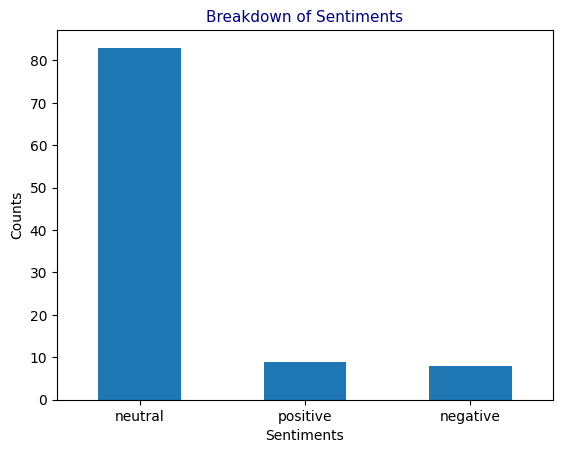

In [66]:
articles_df['sentiment'].value_counts().plot(kind='bar',rot=0)
plt.ylabel('Counts')
plt.xlabel('Sentiments')
plt.title('Breakdown of Sentiments',color='navy',fontsize='11')
plt.show()